In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
!pip install shap
import shap
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

train_reviews = [decode_review(review) for review in train_data]
test_reviews = [decode_review(review) for review in test_data]


In [7]:
vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_reviews)
X_test = vectorizer.transform(test_reviews)


In [8]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,train_labels)

LogisticRegression(max_iter=1000)

In [10]:
explainer=shap.LinearExplainer(model,X_train)
shap_values=explainer.shap_values(X_test)

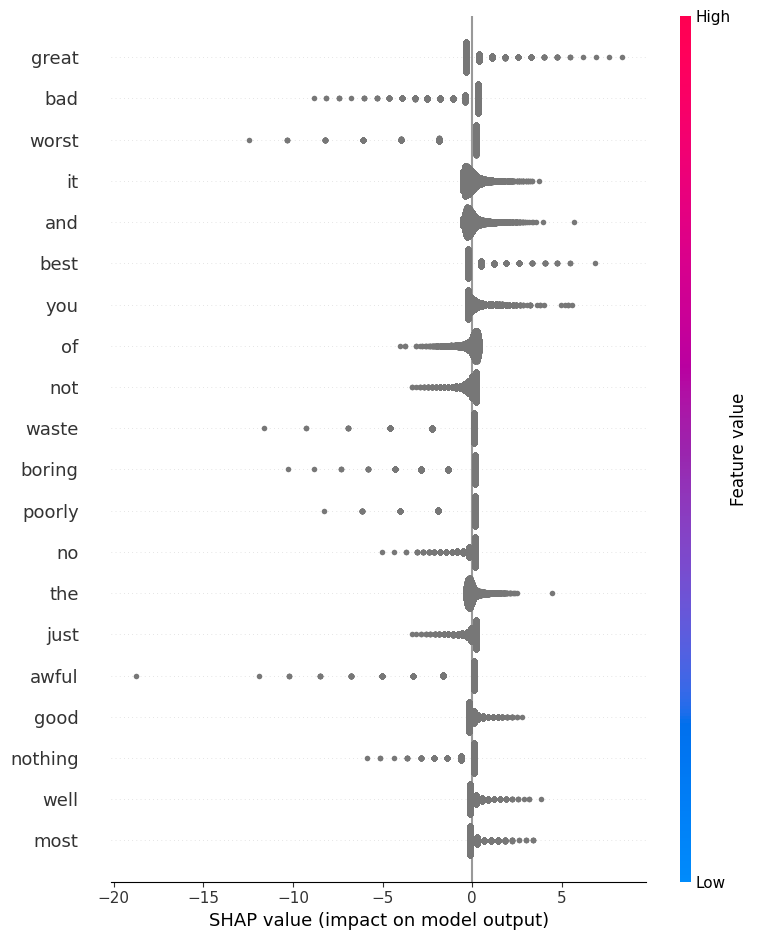

In [11]:
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=vectorizer.get_feature_names_out())

In [14]:
prediction=model.predict(X_test)
accuracy=np.mean(prediction==test_labels)
print(accuracy*100)

85.548


In [13]:
def predict_review(review):
    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)
    sentiment = "positive" if prediction[0] == 1 else "negative"
    return sentiment

In [16]:
while True:
  user_review=input("Enter a movie review (or type 'exit' to quit): ")
  if user_review.lower()=='exit':
    break
  sentiment=predict_review(user_review)
  print("Sentiment:",sentiment)

Enter a movie review (or type 'exit' to quit): good
Sentiment: positive
Enter a movie review (or type 'exit' to quit): bad
Sentiment: negative
Enter a movie review (or type 'exit' to quit): exit
